In [39]:
# Load dataset
import pandas as pd
df = pd.read_csv(r'C:\Users\kheec\Documents\Coursera\IBM Advanced\Capstone\AMD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [44]:
data = df[['Date', 'Open', 'High', 'Low', 'Close']]

In [45]:
import plotly.graph_objs as go

fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close']),
                   go.Scatter(name = 'Open',x= data['Date'],y= data['Open']),
                   go.Scatter(name = 'High',x= data['Date'],y= data['High']),
                   go.Scatter(name = 'Low',x= data['Date'],y= data['Low'])
                    ])

fig.show()

In [46]:
dfs = data.loc[data['Date'] >'1995']

#dfs = data

dfs

,Date,Open,High,Low,Close
3741,1995-01-03,12.625000,12.750000,12.437500,12.500000
3742,1995-01-04,12.625000,12.875000,12.500000,12.812500
3743,1995-01-05,12.750000,12.875000,12.687500,12.750000
3744,1995-01-06,12.812500,13.937500,12.500000,13.937500
3745,1995-01-09,14.375000,14.562500,14.250000,14.437500
...,...,...,...,...,...
10632,2022-05-16,93.860001,98.169998,93.080002,94.239998
10633,2022-05-17,97.879997,103.199997,97.540001,102.470001
10634,2022-05-18,100.000000,104.220001,95.709999,96.279999
10635,2022-05-19,96.690002,100.690002,95.089996,96.669998


In [47]:
df = dfs.iloc[:,1:]

df

,Open,High,Low,Close
3741,12.625000,12.750000,12.437500,12.500000
3742,12.625000,12.875000,12.500000,12.812500
3743,12.750000,12.875000,12.687500,12.750000
3744,12.812500,13.937500,12.500000,13.937500
3745,14.375000,14.562500,14.250000,14.437500
...,...,...,...,...
10632,93.860001,98.169998,93.080002,94.239998
10633,97.879997,103.199997,97.540001,102.470001
10634,100.000000,104.220001,95.709999,96.279999
10635,96.690002,100.690002,95.089996,96.669998


<Axes: >

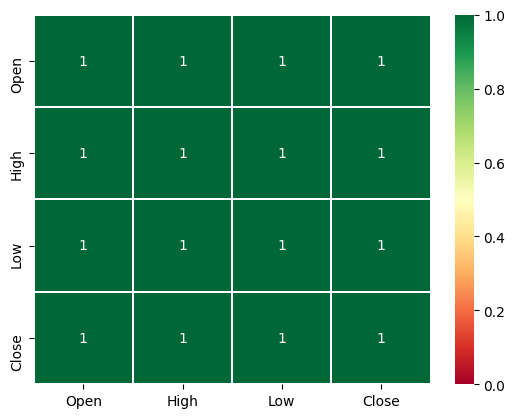

In [48]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

In [2]:
# Check missing value
missing_value = df.isnull().sum()
missing_value

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10637 entries, 0 to 10636
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10637 non-null  object 
 1   Open       10637 non-null  float64
 2   High       10637 non-null  float64
 3   Low        10637 non-null  float64
 4   Close      10637 non-null  float64
 5   Adj Close  10637 non-null  float64
 6   Volume     10637 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 581.8+ KB


In [4]:
# Use timestamp to convert date to numerical
df['Date'] = pd.to_datetime(df['Date'])
df['numeric_date'] = df['Date'].astype('int64')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,numeric_date
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600,322099200000000000
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200,322185600000000000
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200,322272000000000000
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600,322358400000000000
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800,322444800000000000


In [5]:
# Compute correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Date,Open,High,Low,Close,Adj Close,Volume,numeric_date
Date,1.000000,0.419436,0.398923,0.399134,0.399010,0.399010,0.672271,1.000000
Open,0.419436,1.000000,0.998020,0.997984,0.997605,0.997605,0.462252,0.419436
High,0.398923,0.998020,1.000000,0.999625,0.999695,0.999695,0.460666,0.398923
Low,0.399134,0.997984,0.999625,1.000000,0.999682,0.999682,0.454361,0.399134
Close,0.399010,0.997605,0.999695,0.999682,1.000000,1.000000,0.457744,0.399010
Adj Close,0.399010,0.997605,0.999695,0.999682,1.000000,1.000000,0.457744,0.399010
Volume,0.672271,0.462252,0.460666,0.454361,0.457744,0.457744,1.000000,0.672271
numeric_date,1.000000,0.419436,0.398923,0.399134,0.399010,0.399010,0.672271,1.000000


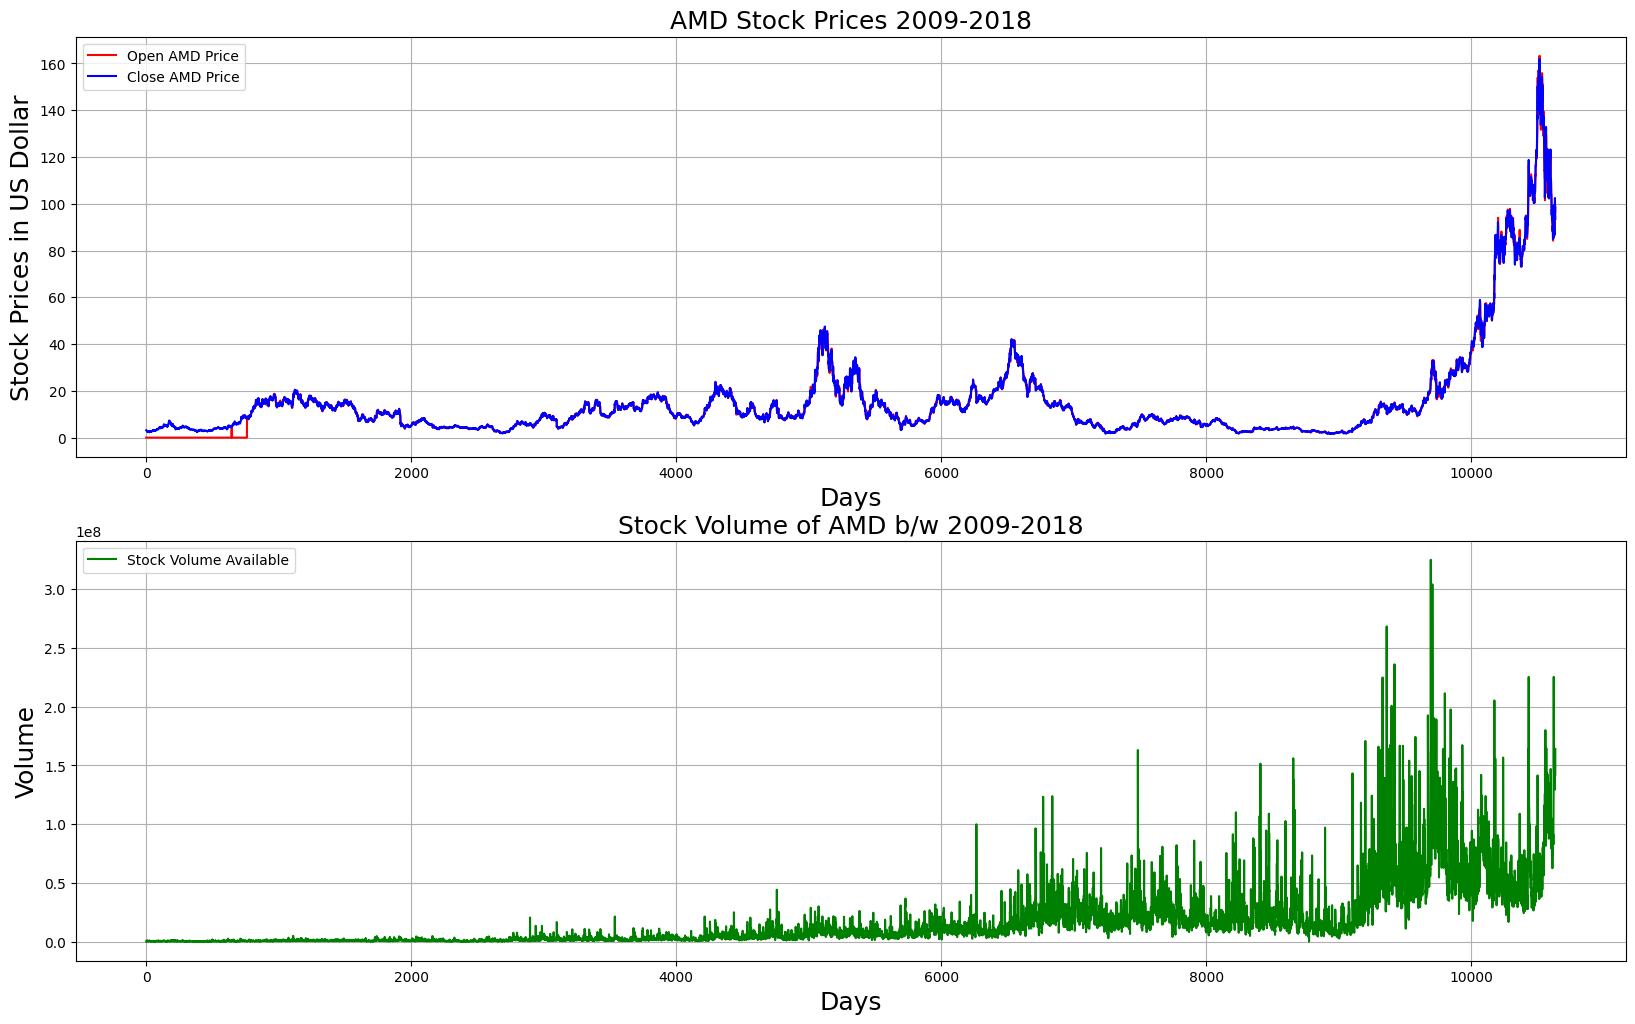

In [6]:
# Visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,12))
x = np.arange(0, df.shape[0], 1)
plt.subplot(2,1,1)
plt.plot(x, df.Open.values, color = "red", label = "Open AMD Price")
plt.plot(x, df.Close.values, color = "blue", label = "Close AMD Price")
plt.title("AMD Stock Prices 2009-2018", fontsize = 18)
plt.xlabel("Days", fontsize = 18)
plt.ylabel("Stock Prices in US Dollar", fontsize = 18)
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")

plt.subplot(2,1,2)
plt.plot(x, df.Volume.values, color = "green", label = "Stock Volume Available")
plt.title("Stock Volume of AMD b/w 2009-2018", fontsize = 18)
plt.xlabel("Days", fontsize = 18)
plt.ylabel("Volume", fontsize = 18)
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")
plt.show()

In [50]:
training_set = df.iloc[:round(len(df)*0.8)].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
training_set = scaler.fit_transform(training_set)

print(training_set.shape)


(5517, 4)


In [51]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'training_set' is your dataset

trainX = [] 
trainY = []

in_future = 1  # Number of days we want to predict into the future 
in_past = 28   # Number of past days we want to use to predict the future

for i in range(in_past, len(training_set) - in_future +1): 
    trainX.append(training_set[i - in_past:i, 0:training_set.shape[1]]) 
    trainY.append(training_set[i + in_future - 1:i + in_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)


print('trainX shape = {}.'.format(trainX.shape)) 
print('trainY shape = {}.'.format(trainY.shape))

trainX shape = (5489, 28, 4).
trainY shape = (5489, 1).


In [65]:
# Reducing the sequence length
max_sequence_length = 28  # Adjust as needed

# Pad sequences to match the desired sequence length (max_sequence_length)
padded_trainX = pad_sequences(trainX, maxlen=max_sequence_length, padding='post', dtype='float32')

# Define your model
model = Sequential()
model.add(LSTM(units=64, input_shape=(max_sequence_length, 4)))  # Adjust units and sequence length as needed
model.add(Dense(units=4))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print shapes
print('padded_trainX shape:', padded_trainX.shape)  # Should be (samples, max_sequence_length, 4)
print('trainY shape:', trainY.shape)  # Should be (samples,)

# Train the model
history = model.fit(padded_trainX, trainY, epochs=10, batch_size=50, validation_split=0.2, verbose=1)


padded_trainX shape: (5489, 28, 4)
trainY shape: (5489, 1)
Epoch 1/10
88/88 [==============================] - 9s 57ms/step - loss: 0.0079 - val_loss: 1.9807e-04
Epoch 2/10
88/88 [==============================] - 4s 45ms/step - loss: 5.7457e-04 - val_loss: 1.7156e-04
Epoch 3/10
88/88 [==============================] - 4s 44ms/step - loss: 5.2396e-04 - val_loss: 1.2850e-04
Epoch 4/10
88/88 [==============================] - 4s 46ms/step - loss: 4.5516e-04 - val_loss: 7.4240e-05
Epoch 5/10
88/88 [==============================] - 3s 39ms/step - loss: 4.0400e-04 - val_loss: 4.7478e-05
Epoch 6/10
88/88 [==============================] - 4s 43ms/step - loss: 3.9467e-04 - val_loss: 4.2256e-05
Epoch 7/10
88/88 [==============================] - 3s 39ms/step - loss: 3.6273e-04 - val_loss: 3.5981e-05
Epoch 8/10
88/88 [==============================] - 3s 39ms/step - loss: 3.2702e-04 - val_loss: 3.3759e-05
Epoch 9/10
88/88 [==============================] - 4s 47ms/step - loss: 3.1141e-04 - val

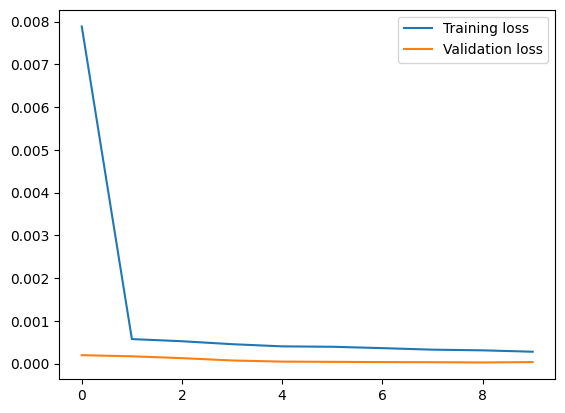

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [67]:
inputs_data =df.iloc[round(len(df)*0.8):,:].values

scaler = MinMaxScaler(feature_range=(0, 1))
inputs_data = scaler.fit_transform(inputs_data)


prediction_stocks = []

for i in range(28, len(inputs_data)):
    prediction_stocks.append(inputs_data[i-28:i])
    
prediction_stocks = np.array(prediction_stocks)

In [68]:
predictions = model.predict(prediction_stocks)


43/43 [==============================] - 1s 9ms/step


In [69]:
y_pred_future = scaler.inverse_transform(predictions)


In [70]:
df_forecast = pd.DataFrame({'Date':dfs.Date[-y_pred_future.shape[0]:],
                            'Open': y_pred_future[:,0],
                            'High':y_pred_future[:,1],
                            'Low':y_pred_future[:,2], 
                            'Close':y_pred_future[:,3]})

df_forecast

,Date,Open,High,Low,Close
9286,2017-01-10,12.530244,12.834358,11.861074,11.953971
9287,2017-01-11,12.524415,12.830989,11.851057,11.955802
9288,2017-01-12,12.478387,12.786884,11.803963,11.903394
9289,2017-01-13,12.332738,12.633530,11.669959,11.706949
9290,2017-01-17,12.190210,12.497699,11.535047,11.554885
...,...,...,...,...,...
10632,2022-05-16,92.345322,92.945457,88.641670,91.552391
10633,2022-05-17,93.644623,94.430847,89.876198,93.286705
10634,2022-05-18,96.450203,97.494659,92.858902,96.577316
10635,2022-05-19,98.200310,99.009460,94.227364,98.211830


In [71]:
import plotly.graph_objs as go

fig2=go.Figure(data=[go.Scatter(name = 'Close',x= dfs['Date'],y= dfs['Close']),
                   go.Scatter(name = 'Close_Predicted',x= df_forecast['Date'],y= df_forecast['Close'])
                    ])

fig2.show()